In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn. preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [82]:
df = pd.read_csv('bank_transactions.csv')
df.shape

(1048567, 9)

In [83]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [84]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [44]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

TransactionID :
 ['T1' 'T2' 'T3' ... 'T1048565' 'T1048566' 'T1048567']
T1          1
T699051     1
T699038     1
T699039     1
T699040     1
           ..
T349528     1
T349529     1
T349530     1
T349531     1
T1048567    1
Name: TransactionID, Length: 1048567, dtype: int64

 **************************************** 

CustomerID :
 ['C5841053' 'C2142763' 'C4417068' ... 'C8020229' 'C6459278' 'C6420483']
C5533885    6
C6624352    6
C1736254    6
C6735477    6
C1113684    6
           ..
C8716232    1
C4474828    1
C3341662    1
C6821983    1
C6420483    1
Name: CustomerID, Length: 884265, dtype: int64

 **************************************** 

CustomerDOB :
 ['10/1/94' '4/4/57' '26/11/96' ... '18/7/65' '15/5/42' '24/10/44']
1/1/1800    57339
1/1/89        809
1/1/90        784
6/8/91        699
1/1/91        666
            ...  
3/9/60          1
17/11/52        1
11/9/63         1
28/2/47         1
24/10/44        1
Name: CustomerDOB, Length: 17254, dtype: int64

 ******************

In [8]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [45]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

array([[<AxesSubplot:title={'center':'CustAccountBalance'}>,
        <AxesSubplot:title={'center':'TransactionTime'}>],
       [<AxesSubplot:title={'center':'TransactionAmount (INR)'}>,
        <AxesSubplot:>]], dtype=object)

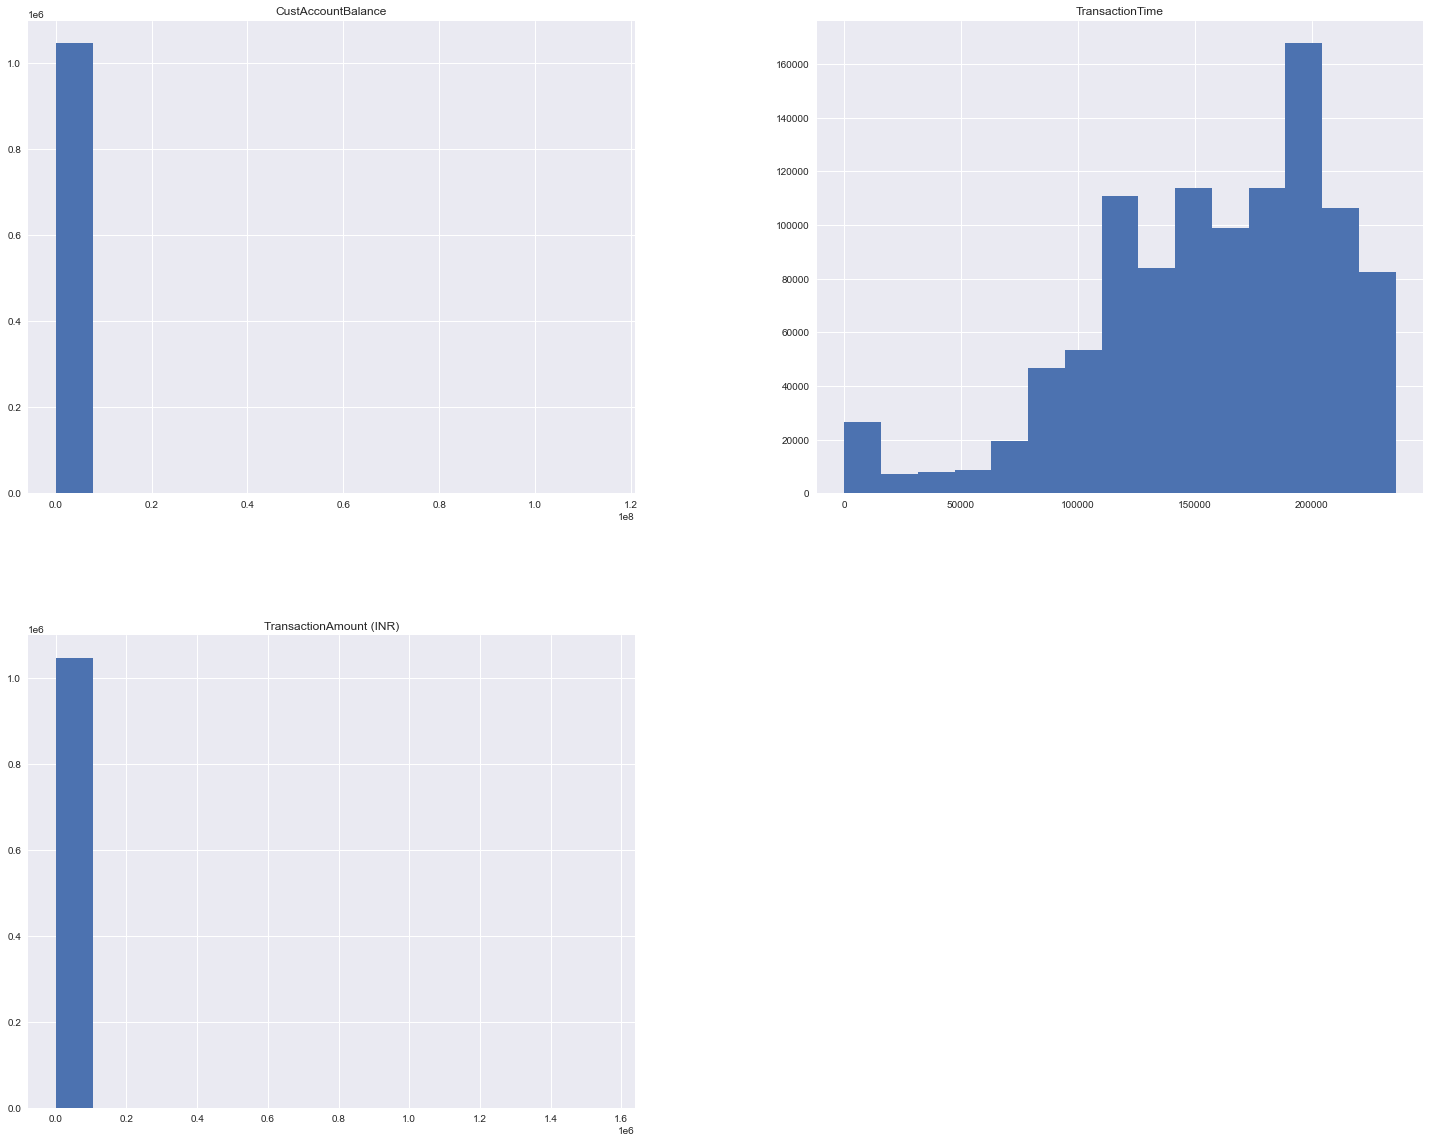

In [46]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [86]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [87]:
# drop missing data
df.dropna(inplace=True)

In [88]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

## Exploratory Data Analysis

In [89]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


### Customer Gender

In [90]:
df['CustGender'].unique()

array(['F', 'M', 'T'], dtype=object)

In [91]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

In [92]:
df['CustGender'].value_counts()

M    760978
F    280635
Name: CustGender, dtype: int64

<AxesSubplot:xlabel='CustGender', ylabel='count'>

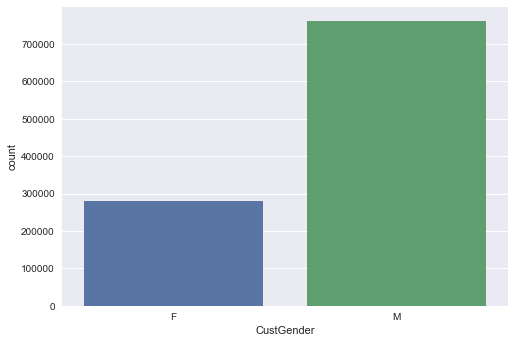

In [93]:
sns.countplot(x="CustGender", data=df)

<AxesSubplot:ylabel='CustGender'>

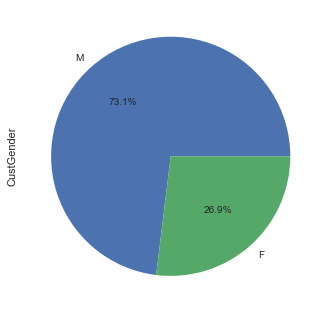

In [94]:
df['CustGender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Customer Location

Text(0.5, 1.0, 'Top 20 Locations of Customer ')

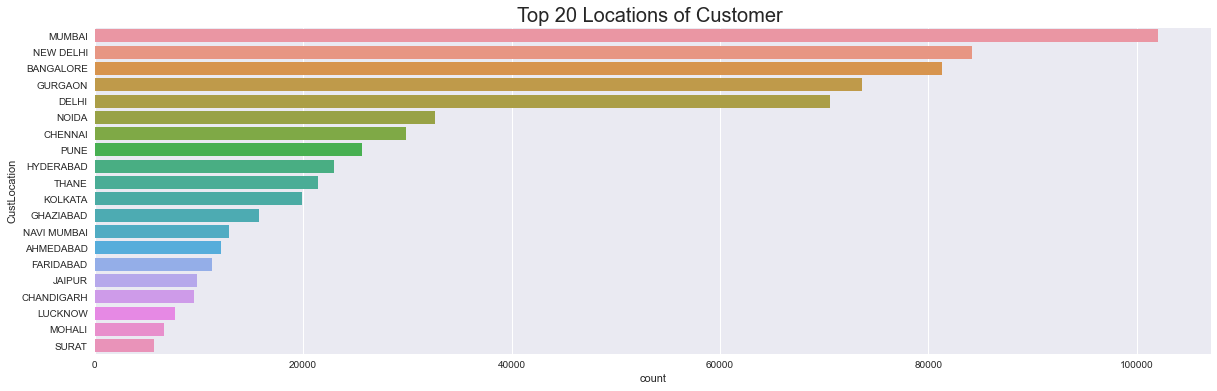

In [95]:
plt.figure(figsize=(20,6))
sns.countplot(y='CustLocation',data=df,
              order = df['CustLocation'].value_counts()[:20].index)
plt.title("Top 20 Locations of Customer ",fontsize='20')

### Customer Age

In [96]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [97]:
df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

Text(0.5, 1.0, 'Top 20 Age of Customer ')

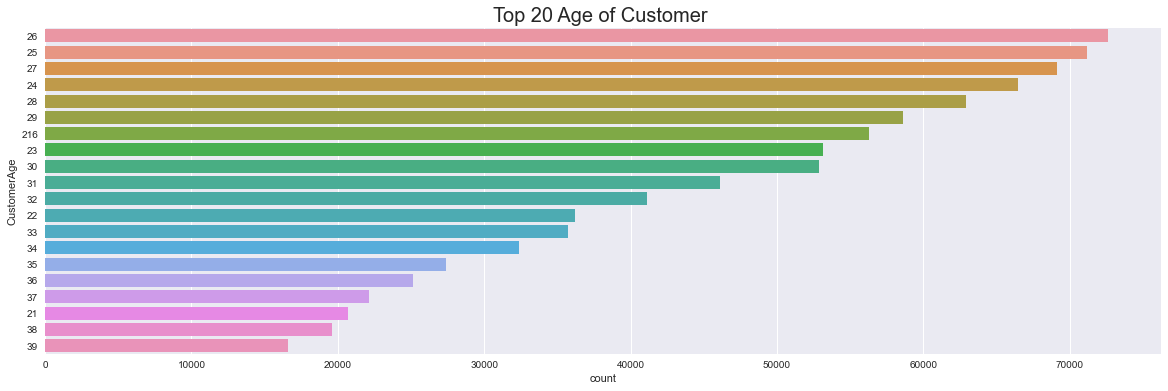

In [98]:
plt.figure(figsize=(20,6))
sns.countplot(y='CustomerAge',data=df,
              order = df['CustomerAge'].value_counts()[:20].index)
plt.title("Top 20 Age of Customer ",fontsize='20')

### Transaction Date and Months

In [99]:
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionMonth'] = df['TransactionDate'].dt.month

In [100]:
df['TransactionDay'].unique()

array([ 8, 21, 16, 14, 17, 19, 24, 22, 29, 31, 23, 13, 25, 28, 15, 27, 20,
       30, 26, 18,  9], dtype=int64)

In [101]:
df['TransactionDay'].value_counts()

9     273919
8     264458
13     47244
14     45252
15     43630
18     33960
26     29991
27     28750
25     26551
21     26474
22     25366
20     21188
17     20960
28     20944
23     20699
16     20281
31     19586
30     19208
19     18559
24     17893
29     16700
Name: TransactionDay, dtype: int64

<AxesSubplot:xlabel='TransactionDay', ylabel='count'>

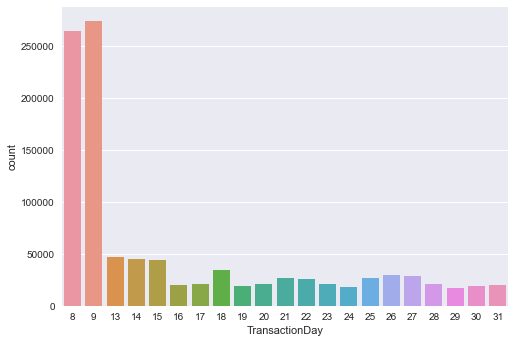

In [102]:
sns.countplot(x="TransactionDay", data=df)

<AxesSubplot:ylabel='TransactionDay'>

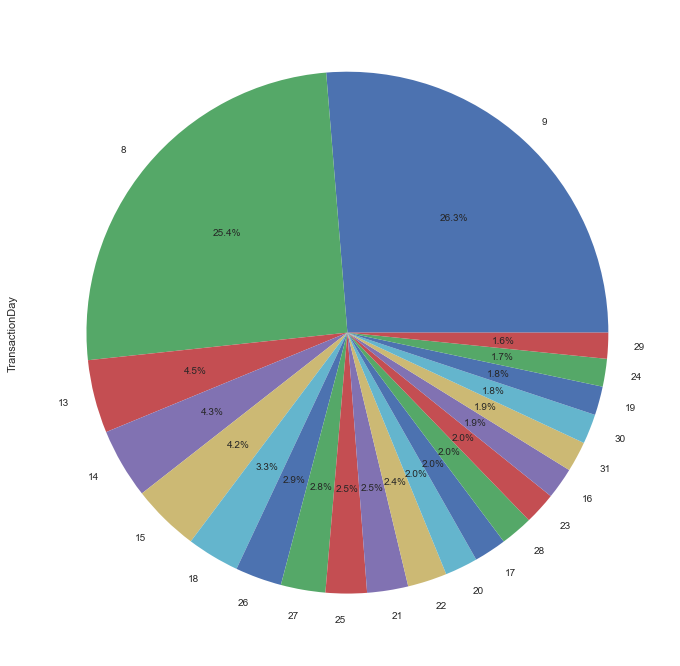

In [103]:
plt.figure(figsize = (12,12))
df['TransactionDay'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [104]:
df['TransactionMonth'].unique()

array([ 2,  1,  3,  5,  4,  6,  9,  8, 12,  7, 10, 11], dtype=int64)

In [105]:
df['TransactionMonth'].value_counts()

8     427316
9     157924
10     50728
7      48083
11     47029
4      46955
3      46738
6      45926
2      43505
12     42888
1      42456
5      42065
Name: TransactionMonth, dtype: int64

<AxesSubplot:xlabel='TransactionMonth', ylabel='count'>

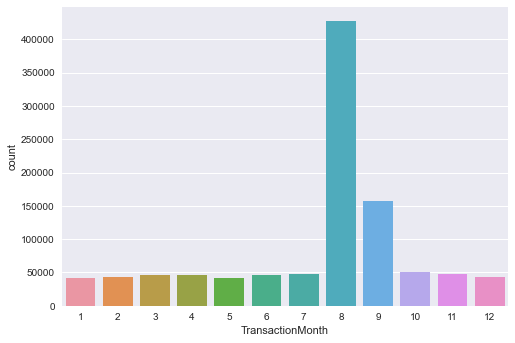

In [106]:
sns.countplot(x="TransactionMonth", data=df)

<AxesSubplot:ylabel='TransactionMonth'>

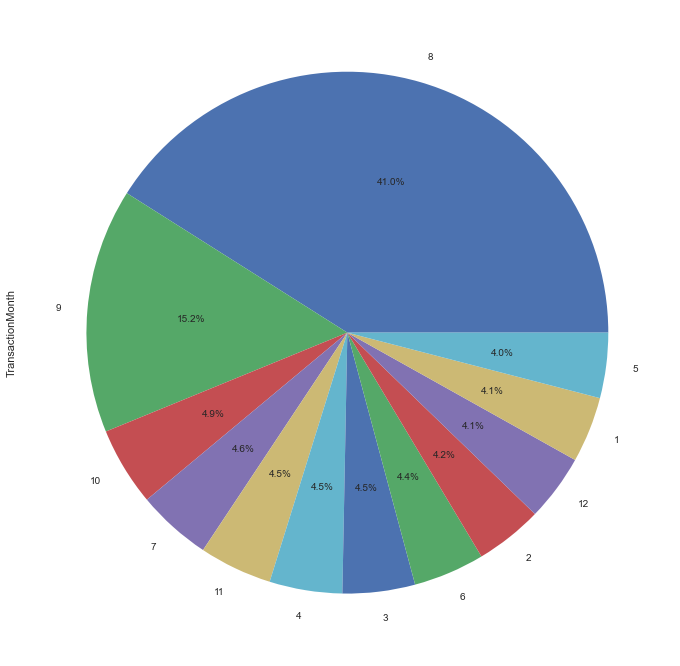

In [107]:
plt.figure(figsize = (12,12))
df['TransactionMonth'].value_counts().plot(kind='pie',autopct='%1.1f%%')

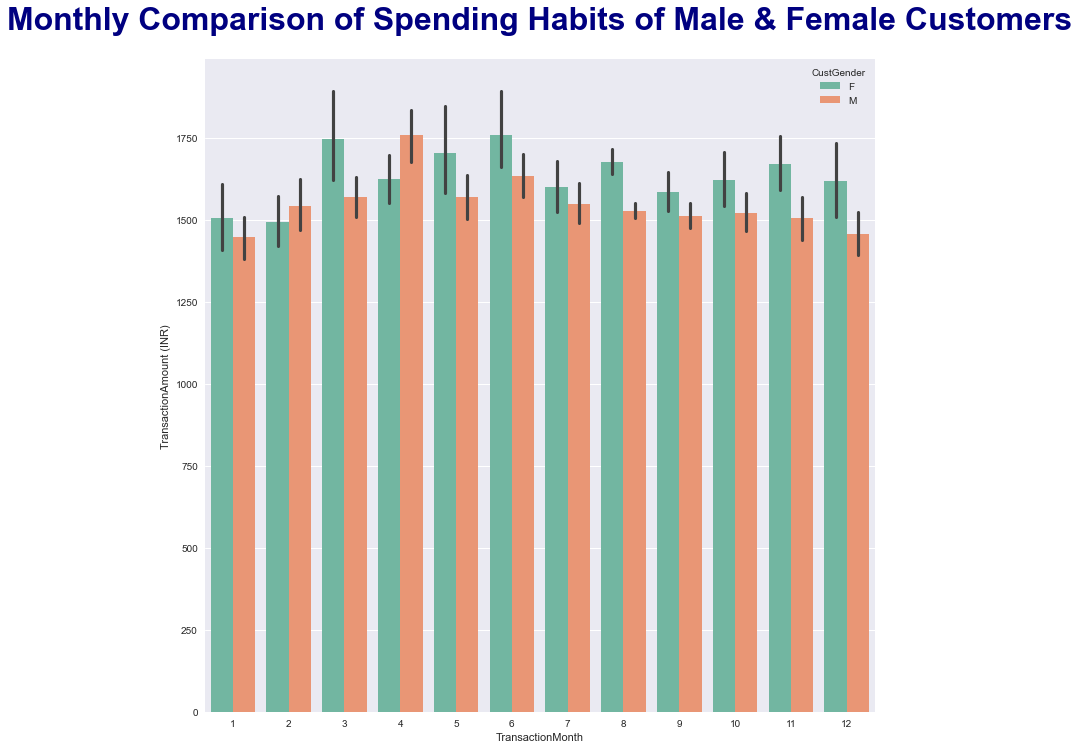

In [67]:
plt.figure(figsize = (12,12))
sns.barplot(data=df,x='TransactionMonth',y='TransactionAmount (INR)',palette='Set2',hue='CustGender')
plt.title('Monthly Comparison of Spending Habits of Male & Female Customers',fontsize=32,fontweight='bold',color='navy',pad=30);

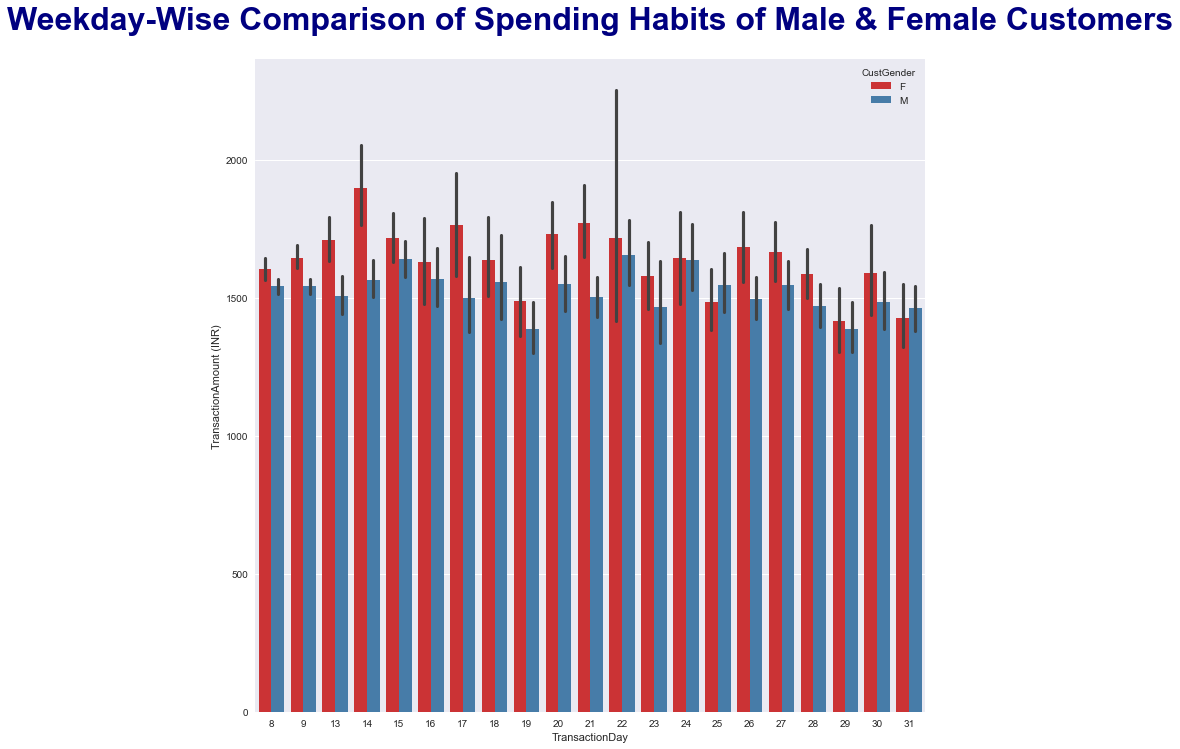

In [68]:
plt.figure(figsize = (12,12))
sns.barplot(data=df,x='TransactionDay',y='TransactionAmount (INR)',palette='Set1',hue='CustGender')
plt.title('Weekday-Wise Comparison of Spending Habits of Male & Female Customers',fontsize=32,fontweight='bold',color='navy',pad=30);

### Transaction Time of the day

In [108]:
import datetime

In [109]:
hh=[int(datetime.datetime.fromtimestamp(i).strftime("%H")) for i in df.TransactionTime.values]
df['hour'] = hh

In [110]:
time = []
for i in hh:
    if i >=6 and i < 13:
        time.append("Morning")
    elif i >= 13 and i<=17:
        time.append("Afternoon")
    elif i > 17 and i <= 22:
        time.append("Evening")
    elif i > 22:
        time.append("Night")
    elif i < 6:
        time.append("Night")
df['Time_of_the_day'] = time

In [111]:
df['Time_of_the_day'].unique()

array(['Afternoon', 'Night', 'Morning', 'Evening'], dtype=object)

In [112]:
df['Time_of_the_day'].value_counts()

Morning      395625
Night        276536
Afternoon    215505
Evening      153947
Name: Time_of_the_day, dtype: int64

<AxesSubplot:xlabel='Time_of_the_day', ylabel='count'>

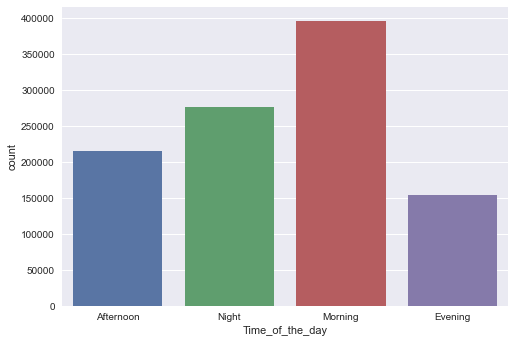

In [113]:
sns.countplot(x="Time_of_the_day", data=df)

<AxesSubplot:ylabel='Time_of_the_day'>

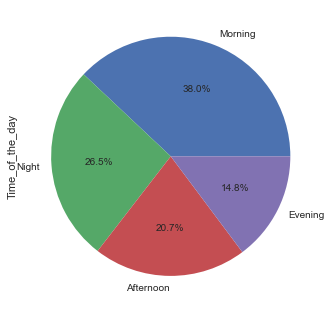

In [114]:
df['Time_of_the_day'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [115]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDay,TransactionMonth,hour,Time_of_the_day
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22,8,2,16,Afternoon
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,-41,8,2,16,Afternoon
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20,8,2,16,Afternoon
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43,8,2,16,Afternoon
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28,8,2,3,Night


### Calculate Recency

In [116]:
df['TransactionDate1']=df['TransactionDate'] 
df['TransactionDate2']=df['TransactionDate'] 

In [117]:
#Creating MRF Table Strategy

MRF_df = df.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "TransactionAmount (INR)" : "mean",
                                        "CustomerAge" : "median",
                                        "TransactionDate2":"max",
                                        "TransactionDate1":"min",
                                        "TransactionDate":"median"
                        })

MRF_df = MRF_df.reset_index()
MRF_df.head()

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate
0,C1010011,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,F,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15
4,C1010024,1,M,KOLKATA,87058.650,5000.0,-49.0,2016-08-18,2016-08-18,2016-08-18


In [118]:
MRF_df.shape

(879357, 10)

In [120]:
MRF_df.drop(columns=["CustomerID"],inplace=True)

In [121]:
MRF_df.rename(columns={"TransactionID":"Frequency"},inplace=True)

In [122]:
MRF_df['Recency']=MRF_df['TransactionDate2']-MRF_df['TransactionDate1']

In [123]:
MRF_df['Recency']=MRF_df['Recency'].astype(str)

In [124]:
# extract the day
x='18 day'
re.search('\d+',x).group()

'18'

In [125]:
MRF_df['Recency']=MRF_df['Recency'].apply(lambda x :re.search('\d+',x).group())
MRF_df['Recency']=MRF_df['Recency'].astype(int)

In [126]:
def rep_0(i):
    if i==0:
        return 1
    else:
        return i
MRF_df['Recency']=MRF_df['Recency'].apply(rep_0)

In [127]:
MRF_df.drop(columns=["TransactionDate1","TransactionDate2"],inplace=True)

In [128]:
# to claculate the otliers for each feature
lower_list=[]
upper_list=[]
num_list=[]
perc_list=[]
cols=['Frequency', 'CustAccountBalance','TransactionAmount (INR)', 'CustomerAge', 'Recency']
for i in cols:
    Q1 = MRF_df[i].quantile(0.25)
    Q3 = MRF_df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # calculate number of outliers
    num=MRF_df[(MRF_df[i] < lower) | (MRF_df[i] > upper)].shape[0]
    # calculate percentage of outliers
    perc = (num / MRF_df.shape[0]) * 100
    lower_list.append(lower)
    upper_list.append(upper)
    num_list.append(num)
    perc_list.append(round(perc,2))

    
dic={'lower': lower_list, 'upper': upper_list, 'outliers': num_list, 'Perc%':perc_list }
outliers_df=pd.DataFrame(dic,index=['Frequency', 'CustAccountBalance','TransactionAmount (INR)', 'CustomerAge', 'Recency'])
outliers_df

,lower,upper,outliers,Perc%
Frequency,1.000,1.000,141961,16.14
CustAccountBalance,-78334.780,145468.020,116569,13.26
TransactionAmount (INR),-1384.325,2816.195,91776,10.44
CustomerAge,10.500,46.500,130866,14.88
Recency,1.000,1.000,136120,15.48


In [132]:
MRF_df.head()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,Recency
0,2,0,76340.635,2553.0,28.5,18
1,1,1,24204.490,1499.0,22.0,1
2,2,0,100112.950,727.5,28.0,182
3,1,0,496.180,30.0,26.0,1
4,1,1,87058.650,5000.0,-49.0,1


In [130]:
MRF_df.drop(columns=['CustLocation','TransactionDate'],inplace=True)

In [131]:
MRF_df['CustGender']=MRF_df['CustGender'].map({'M':1,'F':0})

In [133]:
# data scaling
df_scaled=StandardScaler().fit_transform(MRF_df)
df_scaled=pd.DataFrame(df_scaled,columns=MRF_df.columns)
df_scaled.head()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,Recency
0,1.816407,-1.645853,-0.047903,0.153306,-0.093778,0.045523
1,-0.410992,0.607588,-0.112985,-0.010533,-0.233235,-0.318862
2,1.816407,-1.645853,-0.018228,-0.130458,-0.104506,3.560771
3,-0.410992,-1.645853,-0.142580,-0.238881,-0.147415,-0.318862
4,-0.410992,0.607588,-0.034524,0.533679,-1.756527,-0.318862


### Modeling